<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first stp is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Heart Disease
Heart disease is one of the main causes of death worldwide, so this is a good start to use data science for good.

To learn how to prevent heart disease is necessary to know how to reliably detect it first.

There is a dataset from a study of heart disease that has been open to the public for many years. The study collects various measurements on patient health and cardiovascular statistics, and of course makes patient identities anonymous.

Data is courtesy of **Yeh, I-Cheng** via the **UCI Machine Learning** repository:
- Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008, doi:10.1016/j.eswa.2008.07.018.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [1]:
# Import Libraries

import numpy as np
import pandas as pd

# %matplotlib inline
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import seaborn as sns
import warnings

In [2]:
sns.set(style='ticks', font_scale=1.4)
warnings.filterwarnings('ignore')

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [3]:
df = pd.read_csv("transfusion.data")
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
#Perform some basic structural cleaning to facilitate the work
#1. Changing the cloumn names to more appropriate names
df.columns = ['Recency', 'Frequency', 'Monetary',
              'Time', 'Donated_Mar_2007']
#2.Checking the data types 
print(df.dtypes)
df.head()

Recency             int64
Frequency           int64
Monetary            int64
Time                int64
Donated_Mar_2007    int64
dtype: object


,Recency,Frequency,Monetary,Time,Donated_Mar_2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [5]:
#3.Get more information on the data
df.describe()

,Recency,Frequency,Monetary,Time,Donated_Mar_2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

## Number of features

In [6]:
# Number of features(Method 1)
df.shape[1]

5

In [7]:
# Number of features (Method 2)
print('- Number of features: %d' % df.shape[1])
for c in df.columns:
    print('  - %s' % c)

- Number of features: 5
  - Recency
  - Frequency
  - Monetary
  - Time
  - Donated_Mar_2007


## Data types

In [8]:
# Data types
print('\n- Data types')
print(df.dtypes)


- Data types
Recency             int64
Frequency           int64
Monetary            int64
Time                int64
Donated_Mar_2007    int64
dtype: object


## Domains, Intervals

In [9]:
# Domains, Intervals(Method 1)
for c in df.columns:
    print(c, df[c].min(), df[c].max())

Recency 0 74
Frequency 1 50
Monetary 250 12500
Time 2 98
Donated_Mar_2007 0 1


In [10]:
# Domains, Intervals(Method 2)
print('\n- Domains, Intervals')
for c in df.columns:
    x = df[c].unique()
    x.sort()
    print('  - %-16s: min: %d, max: %d' % (c, df[c].min(), df[c].max()))
    print('    values: %s' % x)



- Domains, Intervals
  - Recency         : min: 0, max: 74
    values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 25
 26 35 38 39 40 72 74]
  - Frequency       : min: 1, max: 50
    values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 26 33 34 38 41 43 44 46 50]
  - Monetary        : min: 250, max: 12500
    values: [  250   500   750  1000  1250  1500  1750  2000  2250  2500  2750  3000
  3250  3500  3750  4000  4250  4500  4750  5000  5250  5500  5750  6000
  6500  8250  8500  9500 10250 10750 11000 11500 12500]
  - Time            : min: 2, max: 98
    values: [ 2  3  4  9 10 11 12 13 14 15 16 17 18 19 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48 49 50 51 52 53 54 55
 57 58 59 60 61 62 63 64 65 69 70 71 72 73 74 75 76 77 78 79 81 82 83 86
 87 88 89 93 95 98]
  - Donated_Mar_2007: min: 0, max: 1
    values: [0 1]


## Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x12942ba10>,
 'caps': [<matplotlib.lines.Line2D at 0x12943a490>,
 'boxes': [<matplotlib.lines.Line2D at 0x12941bc90>],
 'medians': [<matplotlib.lines.Line2D at 0x12943aed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12941bb10>],
 'means': []}

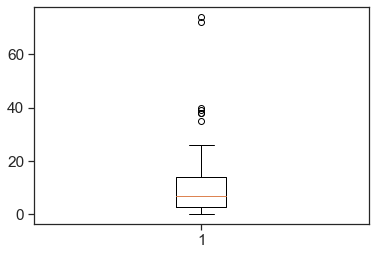

In [11]:
# Check for Outliers(Method 1)
#Repeat the same for all features
plt.boxplot(df['Recency'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1295043d0>,
 'caps': [<matplotlib.lines.Line2D at 0x129583c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x12950f550>],
 'medians': [<matplotlib.lines.Line2D at 0x1295896d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x129589bd0>],
 'means': []}

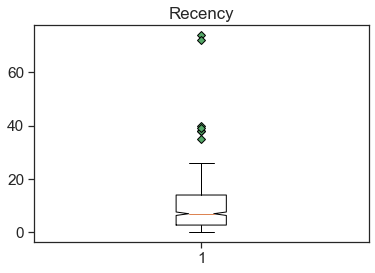

In [12]:
# Check for Outliers(Method 2)
#Repeat the same for all features
fig1, ax1 = plt.subplots()
green_diamond = dict(markerfacecolor='g', marker='D')
ax1.set_title('Recency')
ax1.boxplot(df['Recency'],flierprops=green_diamond,notch=True)

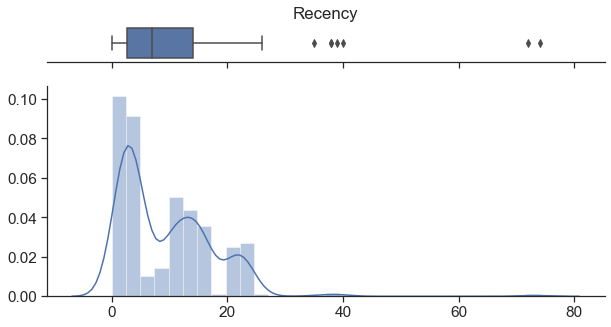

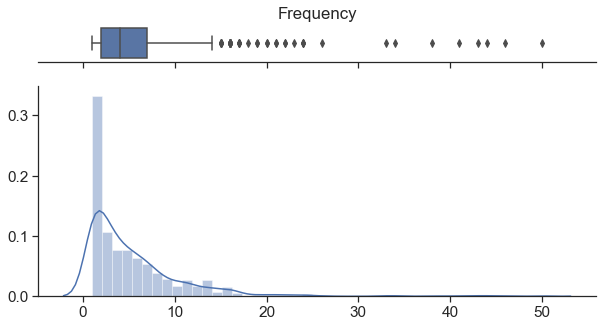

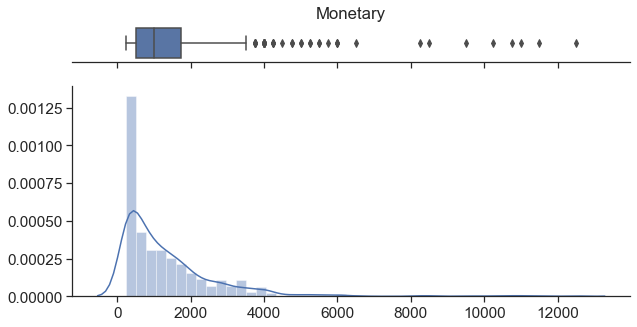

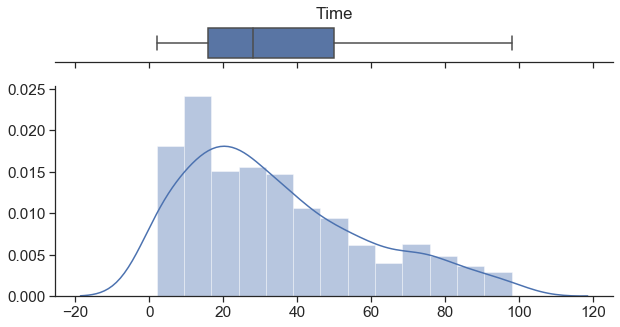

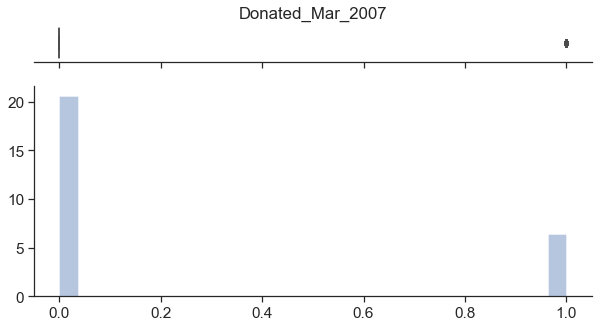

In [13]:
# Check for Outliers(Method 3)
#Loop through all columns with box plot and distplot
for c in df.columns:
    fig, ax = plt.subplots(2,
                           figsize=(10, 5),
                           sharex=True,
                           gridspec_kw={'height_ratios': (0.15, 0.85)})

    ax_box = ax[0]
    ax_box = sns.boxplot(df[c], ax=ax_box)
    ax_box.set(title=c, yticks=[], xlabel='')
    sns.despine(ax=ax_box, left=True)
    

    ax_hist = ax[1]
    ax_hist = sns.distplot(df[c], ax=ax_hist)
    ax_hist.set(xlabel='')
    sns.despine(ax=ax_hist)

plt.show()

## Null

In [14]:
df.isna().sum()

Recency             0
Frequency           0
Monetary            0
Time                0
Donated_Mar_2007    0
dtype: int64

# Missing Values
## No missing values in te system (eg : "empty strings" )

# Coded content
## No coded content in the dataset (eg : 'NA',True instead of 1 , False instead of 0)

In [15]:
df.describe()

,Recency,Frequency,Monetary,Time,Donated_Mar_2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

# Step 5 (Answer): Prepare the Data
Varies as per each problem and modelling.

No specific action is necessary initially.

In [16]:
#Create features and outcome 
# create X and y to match Scikit-Learn parlance

features = ['Recency', 'Frequency', 'Monetary', 'Time']
outcome = 'Donated_Mar_2007'

# X include all the features
X = df[features].copy()
# y is the target variable
# Note: As it is a classification problem,
#       0 and 1 are converted to '0' and '1' (int to str)
y = df[outcome]

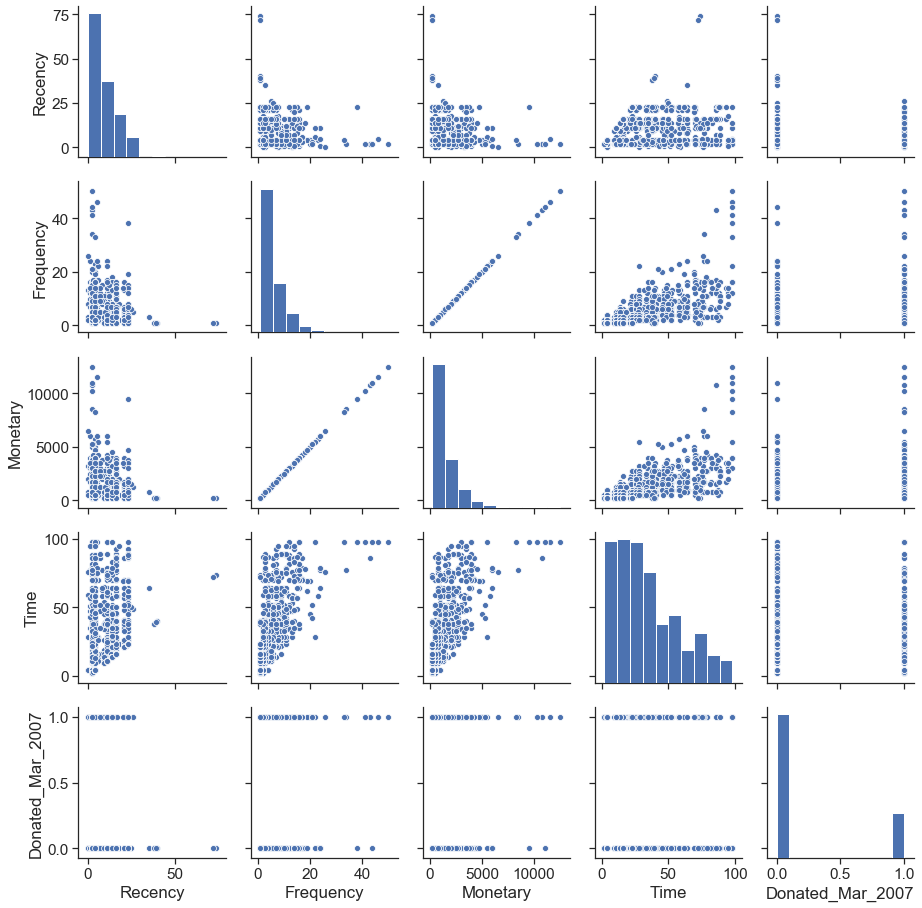

In [17]:
# Visualise the data points

# visualise features in pairs
sns.pairplot(df)
plt.show()

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [18]:
print('What are the input variables (features)?')
print('%s' % ', '.join(features))
print('Is there an output variable (label)?')
print('%s' % ('Yes' if outcome else 'No'))
print('If there is an output variable:')
print('  Which one is it?')
print('  %s' % outcome)
print('  What is its type?')
print('  %s' % y.dtypes)
print('What type of Modelling is it?')
print('[%s] Supervised' % ('x' if outcome else ' '))
print('[%s] Unsupervised' % (' ' if outcome else 'x'))
print('What type of Modelling is it?')
print('[%s] Regression' % ('x' if y.dtypes == 'int64' and (y.value_counts().count() >= 10) else ' '))
print('[%s] Classification (binary)' %
      ('x' if (y.dtypes == 'int64') and (y.value_counts().count() == 2) else ' '))
print('[%s] Classification (multi-class)' %
      ('x' if (y.dtypes == 'int64') and (y.value_counts().count() != 2) else ' '))
print('[%s] Clustering' % (' ' if outcome else 'x'))

What are the input variables (features)?
Recency, Frequency, Monetary, Time
Is there an output variable (label)?
Yes
If there is an output variable:
  Which one is it?
  Donated_Mar_2007
  What is its type?
  int64
What type of Modelling is it?
[x] Supervised
[ ] Unsupervised
What type of Modelling is it?
[ ] Regression
[x] Classification (binary)
[ ] Classification (multi-class)
[ ] Clustering


# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [19]:
#Number of known cases or observations
y.count()

748

In [20]:
y.value_counts()

0    570
1    178
Name: Donated_Mar_2007, dtype: int64

In [21]:
#Define the split in Training/Test or Training/Validation/Test and their proportions
#test_size = X.shape[0] - 500
test_size=.2

In [22]:
# Create training and testing subsets
# Check for unbalanced classes and how to keep or avoid it when spliting: use stratify=y
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=test_size,
    random_state=100666001,
    stratify=y)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [23]:
def summary_report(actual,prediction, probabilities):
    print('    Accuracy score  : ',accuracy_score(actual,prediction))
    print('    Precision score : ',precision_score(actual,prediction))
    print('    Recall score    : ',recall_score(actual,prediction))
    print('    ROC AUC         : ',roc_auc_score(actual,probabilities))
    
    mat = confusion_matrix(actual,prediction)
    fpr, tpr, _ = roc_curve(actual, probabilities)
    roc_auc = auc(fpr, tpr)
    
    # plot
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))
    fig.subplots_adjust(left=0.02, right=0.98, wspace=0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square=True, annot=True, fmt='d',
                cbar=False, cmap='Blues', ax=ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')


    # ROC
    ax[1].plot(fpr, tpr, color='darkorange', lw=2,
               label='ROC curve (AUC = %0.2f)' % roc_auc)
    ax[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title('Receiver Operating Characteristic')
    ax[1].legend(loc='lower right')

    plt.show()

In [24]:
def models(classifier):
    # Train the model using the training sets 
    classifier.fit(X_train, y_train)
    #Predict Score for training data
    y_train_pred = classifier.predict(X_train)
    #Get probability of prediction = 1 for training data
    y_train_proba = classifier.predict_proba(X_train)[:, 1]
    print('\n  Summary report for Training Data \n')
    #call function summary report to display the summary of training actual value and predicted value
    summary_report(y_train,y_train_pred, y_train_proba)
    y_test_pred = classifier.predict(X_test)
    #Get probability of prediction = 1 for test data
    y_test_proba = classifier.predict_proba(X_test)[:, 1]
    print('\n  Summary report for Testing Data \n')
    summary_report(y_test,y_test_pred, y_test_proba)


  Summary report for Training Data 

    Accuracy score  :  0.9431438127090301
    Precision score :  0.990909090909091
    Recall score    :  0.7676056338028169
    ROC AUC         :  0.9855216827279466


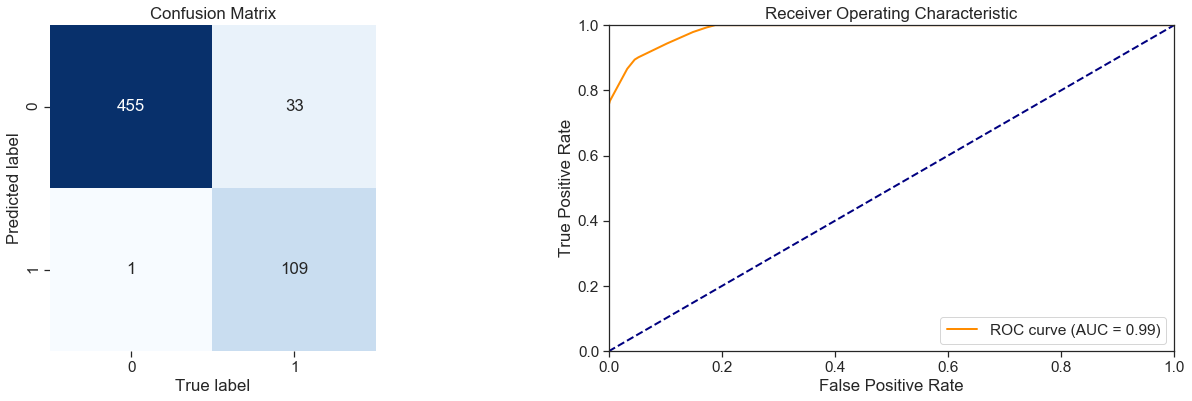


  Summary report for Testing Data 

    Accuracy score  :  0.7
    Precision score :  0.32
    Recall score    :  0.2222222222222222
    ROC AUC         :  0.5626218323586745


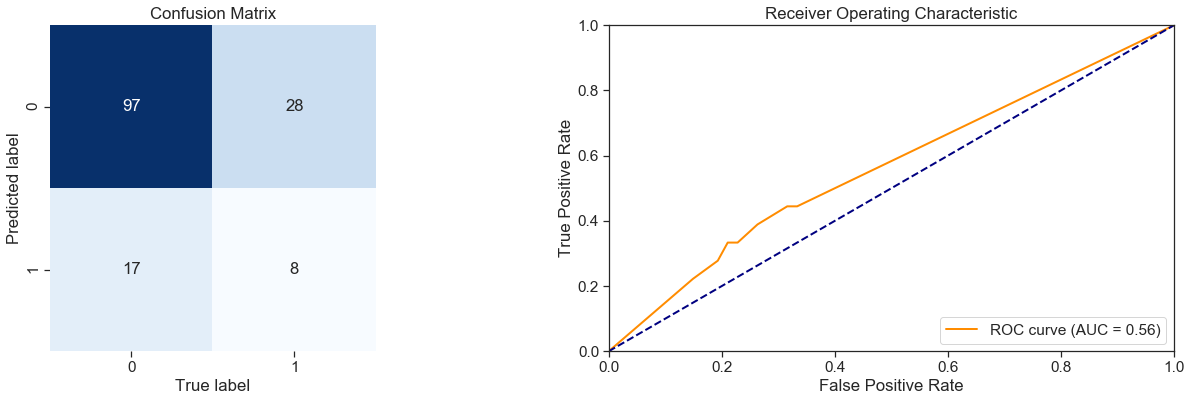

In [25]:
models(classifier = DecisionTreeClassifier())


  Summary report for Training Data 

    Accuracy score  :  0.8612040133779264
    Precision score :  0.7920792079207921
    Recall score    :  0.5633802816901409
    ROC AUC         :  0.9292145416357797


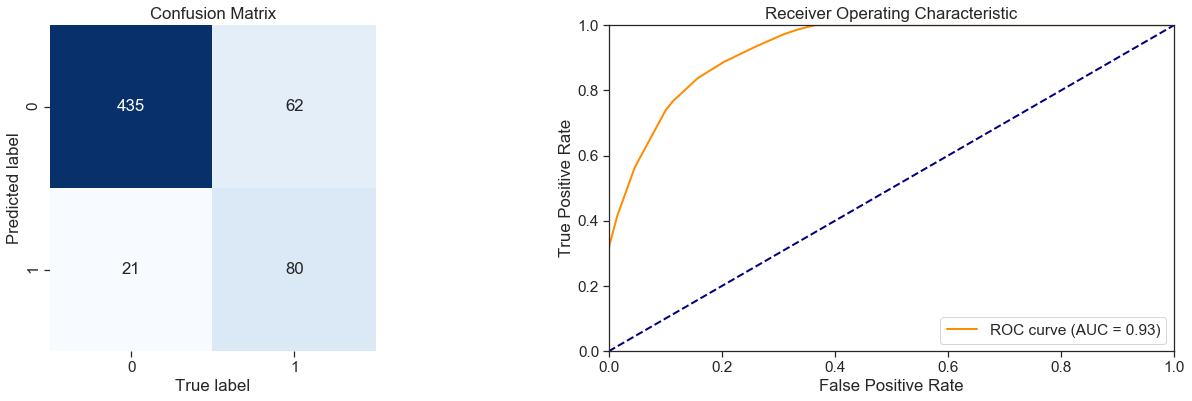


  Summary report for Testing Data 

    Accuracy score  :  0.7466666666666667
    Precision score :  0.4583333333333333
    Recall score    :  0.3055555555555556
    ROC AUC         :  0.657285575048733


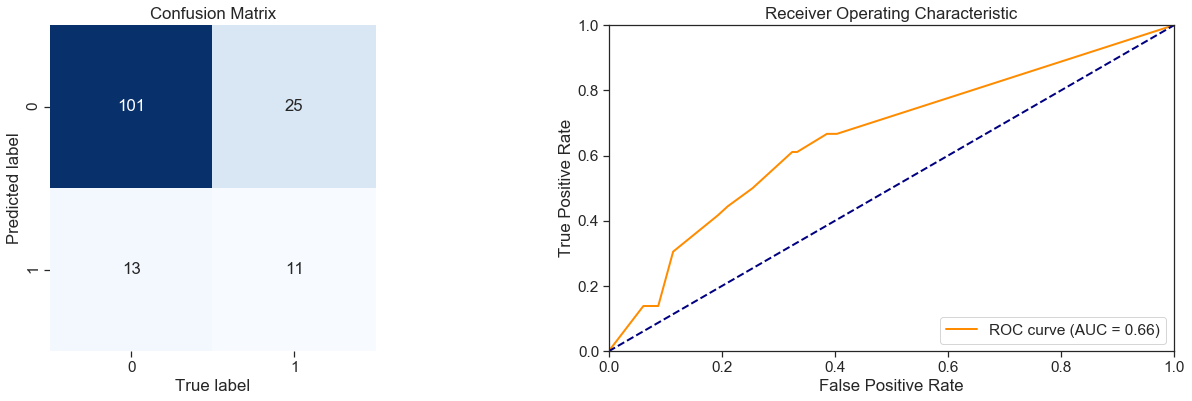

In [26]:
models(classifier = DecisionTreeClassifier(max_depth=10,min_samples_leaf=2,max_features='sqrt',random_state=42))

In [ ]:
models(classifier = SVC(kernel='linear',C=0.025,probability=True,random_state=42))

In [ ]:
models(classifier = KNeighborsClassifier(n_neighbors=10))

In [ ]:
models(classifier = LogisticRegression(solver='liblinear',random_state=42))

# Step 9: Fit the Model

## Already done within the function models in above section

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

## Already done in above section

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

## Already done in above section

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

In [ ]:
# Import Libraries

from sklearn.tree import export_graphviz
from graphviz import Source

In [ ]:
X = df[features].copy()
# y is the target variable
# Note: As it is a classification problem,
#       0 and 1 are converted to '0' and '1' (int to str)
y = df[outcome].astype(str).copy()

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=.2,
    random_state=42,
    stratify=y)


In [ ]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
#y_pred=model.predict(X_test)
graph_data = export_graphviz(model,
                             max_depth=4,
                             proportion=True,
                             feature_names=features,
                             class_names=y.unique(),
                             filled=True,
                             rounded=True,
                             out_file=None)

In [ ]:
# Export the Decision Tree to a GraphViz data file
graph = Source(graph_data)
graph.format = 'png'
# create the visual object
graph.render(filename='output')
# show it
graph

>

>

>



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



